In [11]:
import abacus_cosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import Counter
%matplotlib inline

In [12]:
np.__version__

'1.15.4'

In [3]:
halo_data = ach.read_halos_FoF("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/")

In [4]:
halo_table = Table(halo_data)

In [5]:
halo_table[:1]

id,subsamp_start,subsamp_len,N,subhalo_N [4],pos [3],vel [3],sigma_v [3],r25,r50,r75,r90,vcirc_max,rvcirc_max,subhalo_pos [3],subhalo_vel [3],subhalo_sigma_v [3],subhalo_r25,subhalo_r50,subhalo_r75,subhalo_r90,subhalo_vcirc_max,subhalo_rvcirc_max
int64,uint64,uint32,uint32,uint32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
33242377525485,0,2701,27838,10581 .. 586,-498.60577 .. 409.212,184.10143 .. -221.06378,1103.6188 .. 784.6088,1.6821681,2.0619814,2.773661,3.4043431,1268.671,2.4715793,-499.46762 .. 409.26157,314.42062 .. -41.576843,1304.2107 .. 787.263,0.7284749,1.6034807,4.082432,5.2991858,1444.855,1.0359467


In [6]:
print(len(halo_table))

6376922


In [7]:
sigma_v = halo_data['vcirc_max']
print(min(sigma_v))

87.371994


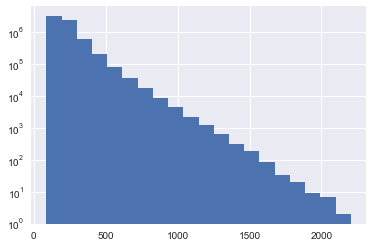

In [8]:
_ = plt.hist(sigma_v, log=True, bins=20)

In [10]:
print(np.count_nonzero(sigma_v>300))
print(halo_data['pos'].min())

914640
-550.0


In [30]:
ii = (sigma_v>200)
pos_high_mass = halo_data['pos'][ii]
sigma_v_high = sigma_v[ii]

In [17]:
pos_high_mass

array([[-498.60577,  530.043  ,  409.212  ],
       [-348.728  ,  532.7601 ,  118.81715],
       [-451.55487,  542.8891 , -500.8309 ],
       ...,
       [ 488.64554, -377.45413, -302.85175],
       [ 383.27612, -394.918  , -339.76508],
       [ 334.3979 , -398.67795,  224.76846]], dtype=float32)

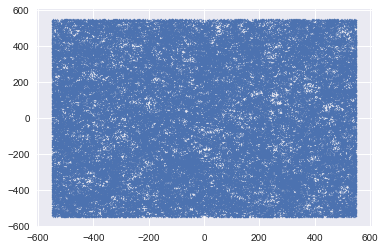

In [20]:
ii = pos_high_mass[:,2]>450
plt.scatter(pos_high_mass[ii,0], pos_high_mass[ii,1], alpha=0.5, s=1.0)
#plt.xlim([0,200])
#plt.ylim([0,200])

In [54]:
delta_center = 200
radius = 100
cut =0 
for center_i in [-2,-1,0,1,2]:
    for center_j in [-2,-1,0,1,2]:
        for center_k in [-2,-1,0,1,2]:
            center_x = center_i * delta_center
            center_y = center_j * delta_center
            center_z = center_k * delta_center
            r = np.sqrt((pos_high_mass[:,0]-center_x)**2 + (pos_high_mass[:,1]-center_y)**2 + (pos_high_mass[:,2]-center_z)**2)
            #ll = (r>radius) & (r<radius+10)
            ll = r<radius
            pos_sphere = np.zeros((len(pos_high_mass[ll]),3))
            pos_sphere[:,0] = pos_high_mass[ll,0]
            pos_sphere[:,1] = pos_high_mass[ll,1]
            pos_sphere[:,2] = pos_high_mass[ll,2]
            #pos_sphere[:,3] = sigma_v_high[ll]
            #pos_sphere = np.vstack([pos_high_mass[ll],sigma_v_high[ll]])
            print(center_i, center_j, center_k, len(pos_sphere))
            np.savetxt("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_{}.dat".format(cut), pos_sphere)
            
            ll = (r<radius) & (r>(radius-10))
            pos_sphere = np.zeros((len(pos_high_mass[ll]),3))
            pos_sphere[:,0] = pos_high_mass[ll,0]
            pos_sphere[:,1] = pos_high_mass[ll,1]
            pos_sphere[:,2] = pos_high_mass[ll,2]
            #pos_sphere[:,3] = sigma_v_high[ll]
            print(center_i, center_j, center_k, len(pos_shell))
            np.savetxt("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/shell_data_cut_{}.dat".format(cut), pos_sphere)
            
            cut += 1

-2 -2 -2 9989
-2 -2 -2 2677
-2 -2 -1 9039
-2 -2 -1 2677
-2 -2 0 9962
-2 -2 0 2677
-2 -2 1 9701
-2 -2 1 2677
-2 -2 2 9691
-2 -2 2 2677
-2 -1 -2 9287
-2 -1 -2 2677
-2 -1 -1 9598
-2 -1 -1 2677
-2 -1 0 10250
-2 -1 0 2677
-2 -1 1 9507
-2 -1 1 2677
-2 -1 2 9746
-2 -1 2 2677
-2 0 -2 10635
-2 0 -2 2677
-2 0 -1 10186
-2 0 -1 2677
-2 0 0 9946
-2 0 0 2677
-2 0 1 9115
-2 0 1 2677
-2 0 2 9385
-2 0 2 2677
-2 1 -2 9003
-2 1 -2 2677
-2 1 -1 9889
-2 1 -1 2677
-2 1 0 10770
-2 1 0 2677
-2 1 1 9537
-2 1 1 2677
-2 1 2 9219
-2 1 2 2677
-2 2 -2 9718
-2 2 -2 2677
-2 2 -1 9239
-2 2 -1 2677
-2 2 0 8835
-2 2 0 2677
-2 2 1 9048
-2 2 1 2677
-2 2 2 9781
-2 2 2 2677
-1 -2 -2 8858
-1 -2 -2 2677
-1 -2 -1 8170
-1 -2 -1 2677
-1 -2 0 8815
-1 -2 0 2677
-1 -2 1 8553
-1 -2 1 2677
-1 -2 2 9396
-1 -2 2 2677
-1 -1 -2 9380
-1 -1 -2 2677
-1 -1 -1 8628
-1 -1 -1 2677
-1 -1 0 9410
-1 -1 0 2677
-1 -1 1 9790
-1 -1 1 2677
-1 -1 2 8991
-1 -1 2 2677
-1 0 -2 10141
-1 0 -2 2677
-1 0 -1 9157
-1 0 -1 2677
-1 0 0 10076
-1 0 0 2677
-1 0 1 862

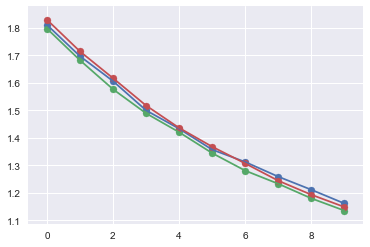

In [171]:
entropy = np.loadtxt("entropy.txt")
plt.plot(range(0,10), entropy)
plt.scatter(range(0,10), entropy)

entropy0 = np.loadtxt("entropy_box_0.txt")
plt.plot(range(0,10), entropy0)
plt.scatter(range(0,10), entropy0)

entropy9 = np.loadtxt("entropy_box_9.txt")
plt.plot(range(0,10), entropy9)
plt.scatter(range(0,10), entropy9)

In [1]:
a = "../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/div_box_1100.0_sigmacut_200.0_cell_10.0_smooth_1.0.npy"

In [2]:
a.replace("div_", "watershed_")

'../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/watershed_box_1100.0_sigmacut_200.0_cell_10.0_smooth_1.0.npy'

In [13]:
subhalo_data = ach.read_halos_Rockstar("../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/")

In [20]:
final_subhalo_data = subhalo_data[['id', 'parent_id', 'pos', 'bulkvel', 'vmax']]

In [21]:
len(final_subhalo_data)

8417897

In [38]:
a = final_subhalo_data[0:10]['pos'].copy()

In [26]:
hubble = 0.6895004

In [28]:
radius = 300*hubble
print(radius)
L_box = 720.0

206.85012


In [73]:
def cut_center(data, center_x=0.0, center_y=0.0, center_z=0.0, center_id=0, radius=206.85012, hubble=0.6895004):
    r = np.sqrt((data['pos'][:,0]-center_x)**2 + (data['pos'][:,1]-center_y)**2 + (data['pos'][:,2]-center_z)**2)
    ll = r<radius
    pos_sphere = data[ll]['pos'].copy()
    pos_sphere[:,0] = pos_sphere[:,0] - center_x
    pos_sphere[:,1] = pos_sphere[:,1] - center_y
    pos_sphere[:,2] = pos_sphere[:,2] - center_z
    r = np.sqrt(pos_sphere[:,0]**2 + pos_sphere[:,1]**2 + pos_sphere[:,2]**2)
    theta = np.arccos(pos_sphere[:,2]/r)
    ll = (pos_sphere[:,0]>0) & (pos_sphere[:,1]>0) & (pos_sphere[:,2]>0) & (theta<(np.pi/2.0)) & (theta>np.pi/4)
    print(center_x, center_y, center_z, len(pos_sphere[ll]))
    np.savetxt("../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/cuts/corner_data_cut_{}.dat".format(center_id), pos_sphere[ll]/hubble)
            
            #ll = (r<radius) & (r>(radius-10))
            #pos_sphere = np.zeros((len(pos_high_mass[ll]),3))
            #pos_sphere[:,0] = pos_high_mass[ll,0]
            #pos_sphere[:,1] = pos_high_mass[ll,1]
            #pos_sphere[:,2] = pos_high_mass[ll,2]
            ##pos_sphere[:,3] = sigma_v_high[ll]
            #print(center_i, center_j, center_k, len(pos_shell))
            #np.savetxt("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/shell_data_cut_{}.dat".format(cut), pos_sphere)

In [77]:
corner_id = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            cut_center(final_subhalo_data, center_x=i*radius, center_y=j*radius, center_z=k*radius, center_id=corner_id)
            corner_id += 1
            print(corner_id)


0.0 0.0 0.0 79005
1
0.0 0.0 206.85012 75830
2
0.0 0.0 413.70024 72653
3
0.0 206.85012 0.0 87429
4
0.0 206.85012 206.85012 72927
5
0.0 206.85012 413.70024 69609
6
0.0 413.70024 0.0 82355
7
0.0 413.70024 206.85012 79996
8
0.0 413.70024 413.70024 68044
9
206.85012 0.0 0.0 73819
10
206.85012 0.0 206.85012 70830
11
206.85012 0.0 413.70024 76675
12
206.85012 206.85012 0.0 77095
13
206.85012 206.85012 206.85012 75258
14
206.85012 206.85012 413.70024 71864
15
206.85012 413.70024 0.0 78189
16
206.85012 413.70024 206.85012 70629
17
206.85012 413.70024 413.70024 77826
18
413.70024 0.0 0.0 76557
19
413.70024 0.0 206.85012 68687
20
413.70024 0.0 413.70024 75661
21
413.70024 206.85012 0.0 71916
22
413.70024 206.85012 206.85012 71856
23
413.70024 206.85012 413.70024 72851
24
413.70024 413.70024 0.0 75514
25
413.70024 413.70024 206.85012 79197
26
413.70024 413.70024 413.70024 79237
27


(-14.970810375507742, 314.3964380483197, -14.94618008110064, 314.4210683427268)

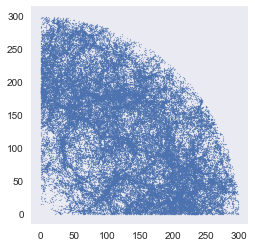

In [97]:
data_cut = np.loadtxt("../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/cuts/corner_data_cut_7.dat")
ii = data_cut[:,2]<400
plt.scatter(data_cut[ii,0], data_cut[ii,1], s=1.0, alpha=0.4)
plt.grid(False)
plt.axis('square')

In [80]:
data_cut

'../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/cuts/corner_data_cut_0.dat'